In [1]:
# Import libraries and modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import tree
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Read and display data shape
imdb = pd.read_csv('IMDB_dataset.csv', nrows=5000)
imdb.shape

(5000, 2)

In [3]:
# # Display last 5 rows of data
# imdb.tail()

In [4]:
# # Summarize data
# imdb.describe()

#### Check  distribution of data

In [5]:
# class_dist = imdb.groupby('sentiment').size()
# labels = 'positive','negative',
# fig, ax = plt.subplots()
# ax.set_title('Class Distribution', y=1.08)
# ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
#        shadow=False, startangle=90)
# ax.axis('equal')

In [6]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
imdb['sentiment']= label_encoder.fit_transform(imdb['sentiment']) 

imdb['sentiment'].unique() 


array([1, 0])

#### Movie reviews vary in length. For example one movie review may contain 20 words while a second one 500 words.Below is a visualization of review length

In [7]:
# lengths = [len(i) for i in imdb['review']]
# print(f'Max length of sentence: {max(lengths)}')
# print(f'Average length of sentence: {np.mean(lengths)}')

# sns.distplot(lengths)

#### Bag of Words
In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors. Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [8]:
# cv = CountVectorizer(stop_words='english') 

# #`data` is an array of strings

# data_cv = cv.fit_transform(imdb['review']) 
 
# print(data_cv)

CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [9]:
# #create a dictionary with feature names as keys and row elements as values
# print(cv.vocabulary_)

#### TFIDF
Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [10]:
# tfidf_transformer = TfidfTransformer()
# data_tfidf = tfidf_transformer.fit_transform(data_cv)
# print(data_tfidf)

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data_tfidf, imdb['sentiment'], test_size=0.30)

### Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

####  Naive Bayes Classification

In [12]:
# bayes_clf = MultinomialNB().fit(X_train, y_train)
# bayes_clf_predicted = bayes_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(bayes_clf_predicted == y_test)*100))

In [13]:
# #Classification report for bag of words for Naive Bayes classification
# bayes_clf_report=classification_report(y_test,bayes_clf_predicted,target_names=['Positive','Negative'])
# print(bayes_clf_report)

In [14]:
# bayes_clf_cm=confusion_matrix(y_test,bayes_clf_predicted,labels=[1,0])
# print(bayes_clf_cm)

# # Plot Confusion Matrix for Naive Bayes
# bayes_clf_dm = pd.DataFrame(bayes_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(bayes_clf_dm, annot=True,cmap="OrRd")

####  Linear SVC Classification

In [15]:
# LinearSVC_clf = LinearSVC().fit(X_train, y_train)
# LinearSVC_clf_predicted = LinearSVC_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(LinearSVC_clf_predicted == y_test)*100))

In [16]:
# #Classification report for bag of words 
# LinearSVC_clf_report=classification_report(y_test,LinearSVC_clf_predicted,target_names=['Positive','Negative'])
# print(LinearSVC_clf_report)

In [17]:
# LinearSVC_clf_cm=confusion_matrix(y_test,LinearSVC_clf_predicted,labels=[1,0])
# print(LinearSVC_clf_cm)

# # Plot Confusion Matrix
# LinearSVC_clf_df_cm = pd.DataFrame(LinearSVC_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(LinearSVC_clf_df_cm, annot=True,cmap="OrRd")

####  Decision Tree Classification

In [18]:
# DecisionTree_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
# DecisionTree_clf_predicted = DecisionTree_clf.predict(X_test)
# print('Test accuracy: %.2f%%' % (np.mean(DecisionTree_clf_predicted == y_test)*100))

In [19]:
# #Classification report for bag of words 
# DecisionTree_clf_report=classification_report(y_test,DecisionTree_clf_predicted,target_names=['Positive','Negative'])
# print(DecisionTree_clf_report)

In [20]:
# DecisionTree_clf_cm=confusion_matrix(y_test,DecisionTree_clf_predicted,labels=[1,0])
# print(DecisionTree_clf_cm)

# # Plot Confusion Matrix
# DecisionTree_clf_df_cm = pd.DataFrame(DecisionTree_clf_cm, index = [i for i in ['positive', 'negative']],
#               columns = [i for i in ['positive', 'negative']])
# plt.figure(figsize = (10,7))
# sns.heatmap(DecisionTree_clf_df_cm, annot=True,cmap="OrRd")

#### Word Cloud

In [21]:
# from wordcloud import WordCloud,STOPWORDS

# #word cloud for positive review words
# plt.figure(figsize=(10,10))
# positive_text=imdb.review[1]
# WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
# positive_words=WC.generate(positive_text)
# plt.imshow(positive_words,interpolation='bilinear')

In [22]:
# #Word cloud for negative review words
# plt.figure(figsize=(10,10))
# negative_text=imdb.review[5052]
# WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
# negative_words=WC.generate(negative_text)
# plt.imshow(negative_words,interpolation='bilinear')
# plt.show

In [23]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

In [24]:
# #Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = simple_stemmer(text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

In [25]:
from nltk.corpus import stopwords
#set stopwords to english
stop=set(stopwords.words('english'))
# print(stop)

#removing the stopword and tokenizing
imdb['review'] = imdb.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)
imdb['review'] = imdb['review'].apply(lambda x: [item for item in x if item not in stop])

In [26]:
imdb.head()

,review,sentiment
0,"[one, review, ha, mention, watch, 1, Oz, episo...",1
1,"[A, wonder, littl, product, film, techniqu, ve...",1
2,"[I, thought, thi, wa, wonder, way, spend, time...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [27]:
from gensim.models.fasttext import FastText
# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 3   # Minimum word count                        
sample = 1e-4   # Downsample setting for frequent words
fastxt = FastText(sentences=imdb.review[:], size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=5)
print(fastxt)

FastText(vocab=13312, size=100, alpha=0.025)


In [28]:
# Get keyvectors  and dictionary of words of FastText model

word_keyvec = (fastxt.wv.vectors_vocab)

word2index = {}
for index, word in enumerate(fastxt.wv.index2word):
    word2index[word] = index

In [29]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Embedding
# from keras.preprocessing.sequence import pad_sequences
# from keras.layers import Conv1D, GlobalMaxPooling1D
# from keras.callbacks import EarlyStopping


# # set parameters:
# max_features = len(word_keyvec)
# maxlen = 100
# batch_size = 256
# embedding_dims = 100
# filters = 64
# kernel_size = 3
# hidden_dims = 250
# epochs = 2


# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(imdb.review[:])
# list_tokenized_review = tokenizer.texts_to_sequences(imdb.review[:])
# word_index = tokenizer.word_index
# print('dictionary size: ', len(word_index))

# review = pad_sequences(list_tokenized_review, maxlen=maxlen)
# sentiment = imdb.sentiment[:]

# x_train, x_test, y_train, y_test = train_test_split(list_tokenized_review, sentiment, test_size=0.20)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

# x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
# x_val = sequence.pad_sequences(x_val, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


# print(len(x_train), 'train sequences')
# print(len(x_test), 'test sequences')

# print('Build model...')
# model = Sequential()

# # we start off with an efficient embedding layer which maps
# # our vocab indices into embedding_dims dimensions
# model.add(Embedding(max_features,
#                     embedding_dims,
#                     weights = [word_keyvec],
#                     trainable=False,
#                     input_length=maxlen))
# model.add(Dropout(0.2))

# # we add a Convolution1D, which will learn filters
# # word group filters of size filter_length:
# model.add(Conv1D(filters,
#                  kernel_size,
#                  padding='valid',
#                  activation='relu',
#                  strides=1))
# # we use max pooling:
# model.add(GlobalMaxPooling1D())

# # We add a vanilla hidden layer:
# model.add(Dense(hidden_dims))
# model.add(Dropout(0.2))
# model.add(Activation('relu'))

# # We project onto a single unit output layer, and squash it with a sigmoid:
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# model.summary()

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam


# set parameters:
max_features = len(word_keyvec)
maxlen = 100
batch_size = 32
embedding_dims = 100
filters = 64
kernel_size = 3
hidden_dims = 250
epochs = 20

new_imdb_review = [] 
for sent in imdb.review:
    temp_sent = []
    for word in sent[:maxlen]:
            try:
                temp_sent.append(word2index[word])
            except KeyError:
                      continue
# Add the padding for each sentence. Here I am padding with 0
    temp_sent += [0] * (maxlen - len(temp_sent))
    new_imdb_review.append(temp_sent)

new_imdb_review = np.array(new_imdb_review)

Using TensorFlow backend.


In [31]:
x_train, x_test, y_train, y_test = train_test_split(new_imdb_review, imdb.sentiment, test_size=0.20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(len(x_train), 'train sequences')
print(len(x_val), 'val sequences')
print(len(x_test), 'test sequences')

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [np.array(word_keyvec)],
                    trainable=True,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

3000 train sequences
1000 val sequences
1000 test sequences
Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1331200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 64)            19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               16250     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_____________________________________________

In [32]:
from keras.callbacks import Callback

class TestCallback(Callback):
    
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [33]:

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=4)])

/home/okaba/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 1000 samples
Epoch 1/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.6563 - accuracy: 0.6053 - val_loss: 0.5651 - val_accuracy: 0.7330

Testing loss: 0.5519078767299652, acc: 0.7400000095367432

Epoch 2/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4665 - accuracy: 0.7830 - val_loss: 0.4285 - val_accuracy: 0.8020

Testing loss: 0.4219324405193329, acc: 0.8109999895095825

Epoch 3/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3202 - accuracy: 0.8693 - val_loss: 0.4035 - val_accuracy: 0.8150

Testing loss: 0.395062561571598, acc: 0.824999988079071

Epoch 4/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2038 - accuracy: 0.9237 - val_loss: 0.4137 - val_accuracy: 0.8130

Testing loss: 0.39649195954203603, acc: 0.828000009059906

Epoch 5/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1211 - accuracy: 0.9597 - val_loss: 0.4358 - val_accuracy: 

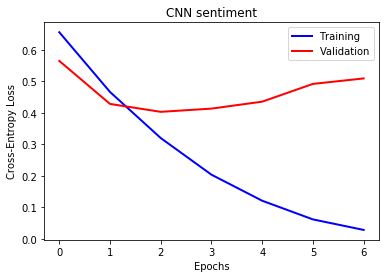

In [34]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='Validation')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

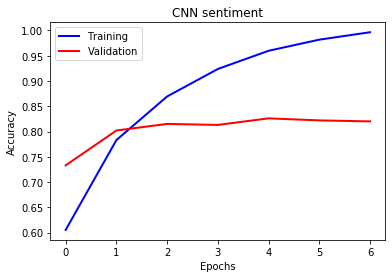

In [35]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='Training')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='Validation')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [36]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D

model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [np.array(word_keyvec)],
                    trainable=True,
                    input_length=maxlen))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=4)])

/home/okaba/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 1000 samples
Epoch 1/20
3000/3000 [==============================] - 19s 6ms/step - loss: 0.6123 - accuracy: 0.6780 - val_loss: 0.5092 - val_accuracy: 0.7660

Testing loss: 0.501701138496399, acc: 0.7549999952316284

Epoch 2/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.4094 - accuracy: 0.8197 - val_loss: 0.4090 - val_accuracy: 0.8270

Testing loss: 0.38134589010477066, acc: 0.8360000252723694

Epoch 3/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.2512 - accuracy: 0.9070 - val_loss: 0.4336 - val_accuracy: 0.8120

Testing loss: 0.4135396476984024, acc: 0.828000009059906

Epoch 4/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1525 - accuracy: 0.9550 - val_loss: 0.4745 - val_accuracy: 0.8260

Testing loss: 0.4398616931438446, acc: 0.8320000171661377

Epoch 5/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0880 - accuracy: 0.9817 - val_loss: 0.5433 - val_accur

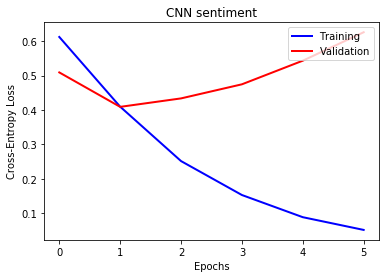

In [37]:
#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='Validation')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

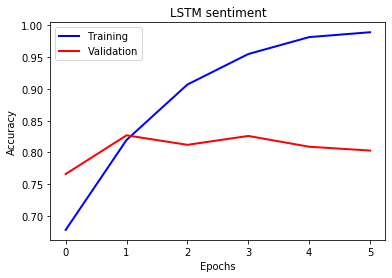

In [38]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='Training')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='Validation')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [39]:
# df_test=pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv",header=0, delimiter="\t", quoting=3)
# df_test.head()
# df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
# df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
# y_test = df_test["sentiment"]
# list_sentences_test = df_test["review"]
# list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
# prediction = model.predict(X_te)
# y_pred = (prediction > 0.5)
# from sklearn.metrics import f1_score, confusion_matrix
# print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
# print('Confusion matrix:')
# confusion_matrix(y_pred, y_test)

In [40]:
# LABELS = ['negative', 'positive']
# sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
# xl = plt.xlabel("Predicted")
# yl = plt.ylabel("Actuals")



# def l2_norm(x):
#    return np.sqrt(np.sum(x**2))

# def div_norm(x):
#    norm_value = l2_norm(x)
#    if norm_value > 0:
#        return x * ( 1.0 / norm_value)
#    else:
#        return x